In [9]:
from ctraptools.analysis.fdcurve import FDCurve
from ctraptools.utils.traceutils import get_average_timestep
from scipy.signal import medfilt

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
# Setting parameters
fpath = "/Users/sc13967/Documents/People/Alex Hughes-Games/merged force events.csv"
T=293 # Temperature for WLC model (K)
P=51.35E-9 # Persistence length (m)
win_w_s = 0.1 # Filter window size (s)

In [11]:
# Getting relevant columns from csv file
# Load csv file
d = pd.read_csv(fpath)

# Get rows corresponding to single event
idx = d.index[(d["event #"]==1) & (d["kymo #"]=="kymo 12")]

# Get relevant columns
time_s = d.loc[idx]['Time (s)']
force_N = d.loc[idx]['Trap 2 corrected (pN)']*1E-12
dist_m = d.loc[idx]['Distance 1 (um)']*1E-6

In [12]:
# Estimate contour length from distance and force
fd = FDCurve(force_N,dist_m)
L = fd.estimate_contour_length(T=293,P=51.35E-9)

In [13]:
# Applying 1d median filter
dt = get_average_timestep(time_s)

win_w_f = math.ceil(win_w_s/dt)
win_w_f = win_w_f + 1 if win_w_f % 2 == 0 else win_w_f

L_filt = medfilt(L,win_w_f)

In [14]:
# Getting instantaneous rate of change of contour length
dLdt = np.diff(L_filt)/np.diff(time_s)

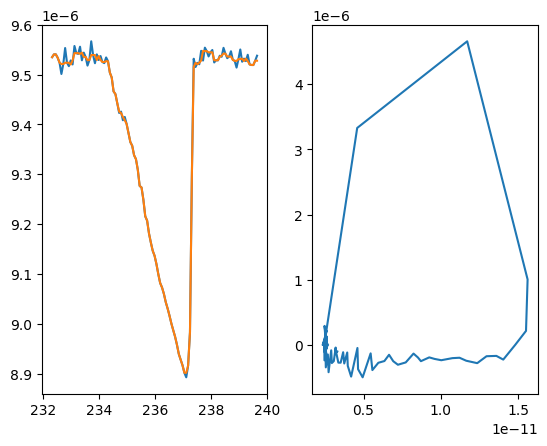

In [15]:
# Plotting

# Estimated contour length vs time
plt.subplot(1,2,1)
plt.plot(time_s,L)
plt.plot(time_s,L_filt)

# Instantaneous rate
plt.subplot(1,2,2)
plt.plot(force_N[:-1],dLdt)

plt.show()